<a href="https://colab.research.google.com/github/Eve113/Desafios-Data-Science/blob/main/AnalisisDeTiendasAluraStoreEPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Tiendas Alura Store
Este proyecto tiene como objetivo ayudar al Sr. Juan a decidir cuál de las 4 tiendas de la cadena Alura Store debería vender, basándose en datos de ventas, rendimiento y reseñas.

Autor: Evelyn Pareja Ríos  
Fecha: Abril 2025

## Importación de datos

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [8]:
# Columna para identificar la tienda de la que proviene el producto

tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unimos todos los datos en un solo DataFrame para mejor comprensión

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Vista Previa

df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


### Análisis de facturación

In [10]:
import matplotlib.pyplot as plt
# Para mayor entendimiento a la persona que vea la tabla y dar claridad vamos a crear una nueva columna que se llame ingresos suponiendo que los ingresos son iguales al precio del producto
df["ingresos"] = df["Precio"]

In [17]:
# Una vez creada la columna "ingresos" procedemos agrupar por tienda y sumar los ingresos reales
ingresos_totales = df.groupby("Tienda")["ingresos"].sum().sort_values(ascending=False)

# mapear esos ingresos al DataFrame original
df['Ingresos totales por tienda'] = df['Tienda'].map(ingresos_totales)

# Muestra la tabla con los ingresos de cada tienda
df[["Tienda", "Ingresos totales por tienda"]].drop_duplicates()


,Tienda,Ingresos totales por tienda
0,Tienda 1,1.212258e+09
2359,Tienda 2,1.175829e+09
4718,Tienda 3,1.156536e+09
7077,Tienda 4,1.093693e+09


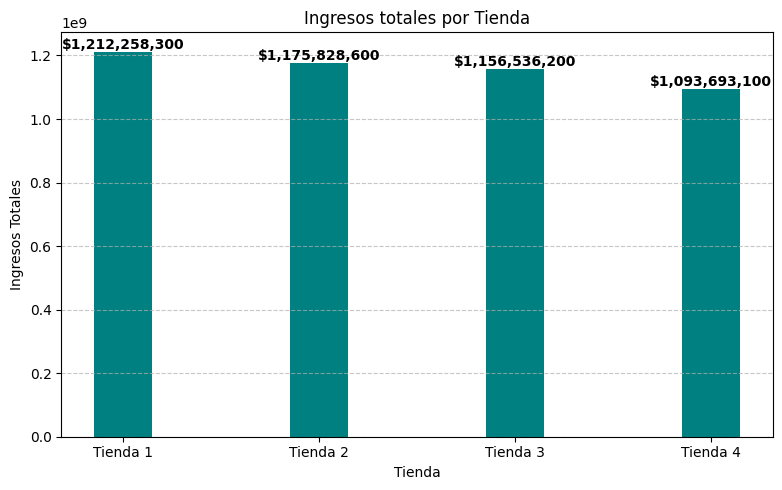

La tienda con más ingresos es: Tienda 1
La tienda con menos ingresos es: Tienda 4


In [18]:
import matplotlib.pyplot as plt

# Crear tabla resumen
ingresos_resumen = df[["Tienda", "Ingresos totales por tienda"]].drop_duplicates()

# Gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(ingresos_resumen["Tienda"], ingresos_resumen["Ingresos totales por tienda"], color='#008080', width=0.3)
plt.title("Ingresos totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos Totales")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de cada barra
for i, valor in enumerate(ingresos_resumen["Ingresos totales por tienda"]):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Mensaje con la tienda con más ingresos
tienda_mas_ingresos = ingresos_resumen.loc[ingresos_resumen["Ingresos totales por tienda"].idxmax(), "Tienda"]
print(f"La tienda con más ingresos es: {tienda_mas_ingresos}")

# Mensaje con la tienda con menos ingresos
tienda_menos_ingresos = ingresos_resumen.loc[ingresos_resumen["Ingresos totales por tienda"].idxmin(), "Tienda"]
print(f"La tienda con menos ingresos es: {tienda_menos_ingresos}")

### Ventas por categoría

In [24]:
# Agrupamos por tienda y categoria del producto, adémas de contar la cantidad de productos vendidos
ventas_por_categoria = df.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad de Ventas")
ventas_por_categoria.head()

,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182


In [33]:
# Ordenamos por tienda y cantidad de ventas (de mayor a menor)
ventas_mayor_menor= ventas_por_categoria.sort_values(by=['Tienda','Cantidad de Ventas'], ascending=[True, False]) # Changed 'Cantidad de ventas' to 'Cantidad de Ventas'

# Creamos el Ranking por tienda
ventas_mayor_menor['Ranking']= ventas_mayor_menor.groupby('Tienda') ['Cantidad de Ventas'].rank(method='first', ascending=False).astype(int) # Changed 'cantidad de ventas' to 'Cantidad de Ventas'

# Filtramos solo el top 5 de cada tienda
Top_Tienda = ventas_mayor_menor[ventas_mayor_menor['Ranking']<=5]
Top_Tienda

,Tienda,Categoría del Producto,Cantidad de Ventas,Ranking
7,Tienda 1,Muebles,465,1
3,Tienda 1,Electrónicos,448,2
5,Tienda 1,Juguetes,324,3
2,Tienda 1,Electrodomésticos,312,4
1,Tienda 1,Deportes y diversión,284,5
15,Tienda 2,Muebles,442,1
11,Tienda 2,Electrónicos,422,2
13,Tienda 2,Juguetes,313,3
10,Tienda 2,Electrodomésticos,305,4
9,Tienda 2,Deportes y diversión,275,5


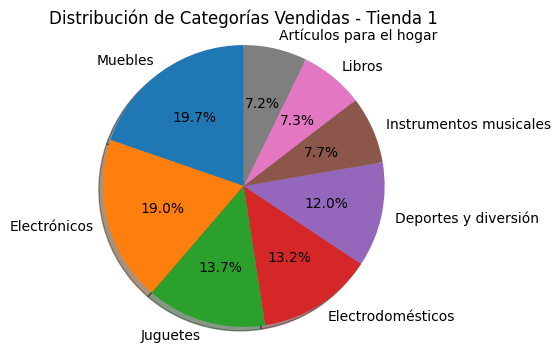

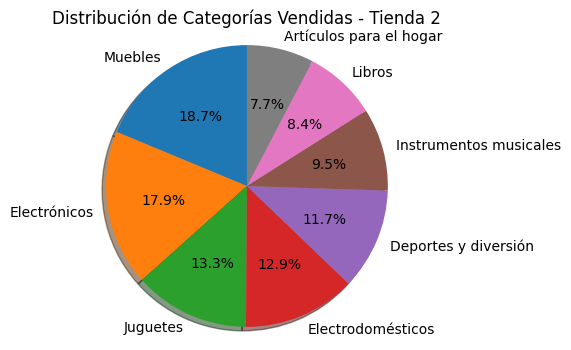

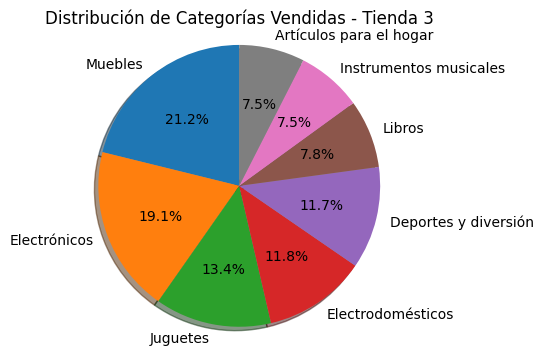

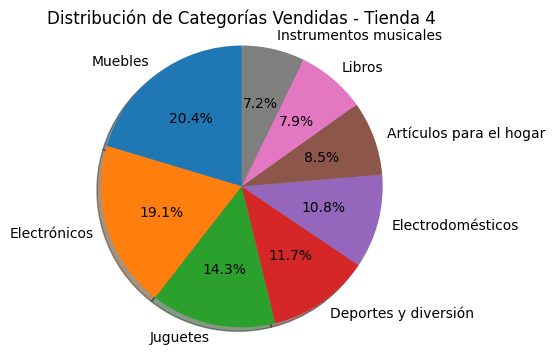


La categoría más vendida es: Muebles
La categoría menos vendida es: Artículos para el hogar


In [42]:
import matplotlib.pyplot as plt
tiendas = df["Tienda"].unique()

# Se creara un grafico por tienda
for tienda in tiendas:
    data_tienda = df[df["Tienda"] == tienda]

    # Contar cuántos productos se vendieron por categoría
    categorias = data_tienda["Categoría del Producto"].value_counts()

    # Creación del gráfico
    plt.figure(figsize=(4, 4))
    plt.pie(categorias, labels=categorias.index, autopct="%1.1f%%", startangle=90, shadow=True)
    plt.title(f"Distribución de Categorías Vendidas - {tienda}")
    plt.axis("equal")  # Para que el gráfico sea circular
    plt.show()
# Categoría más y menos vendida entre todas las tiendas
categoria_total=df['Categoría del Producto'].value_counts()
categoria_mas_vendida = categoria_total.idxmax()
categoria_menos_vendida = categoria_total.idxmin()

print(f'\nLa categoría más vendida es: {categoria_mas_vendida}')
print(f'La categoría menos vendida es: {categoria_menos_vendida}')


### Calificación promedio de la tienda

In [51]:
# Agrupar por tienda y calcular el promedio de la columna Calificación
calificaciones_promedio = df.groupby('Tienda')['Calificación'].mean().reset_index()

# Renombramos la columna para que sea más clara
calificaciones_promedio.rename(columns={'Calificación': 'Calificación Promedio'}, inplace=True)

# Mpstramos la tienda con la mejor calificación promedio
tienda_mejor_valorada = calificaciones_promedio.loc[calificaciones_promedio["Calificación Promedio"].idxmax(), "Tienda"]
print(f"La tienda mejor valorada por los clientes es la {tienda_mejor_valorada}\n ")

# Mostramos la tabla
calificaciones_promedio.sort_values(by='Calificación Promedio', ascending=False)


La tienda mejor valorada por los clientes es la Tienda 3
 


,Tienda,Calificación Promedio
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


### Productos más y menos vendidos

In [56]:
# Agrupar por Tienda y Producto, y contar la cantidad de ventas
ventas_por_producto = df.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad de Ventas")

# Ordenar por tienda y cantidad de ventas
ventas_por_producto_ordenado = ventas_por_producto.sort_values(by=["Tienda", "Cantidad de Ventas"], ascending=[True, False])

# Lista para guardar los resultados
resumen_ventas = []

# Iteramos por tienda y extraemos el más y el menos vendido
for tienda in tiendas:
    productos_tienda = ventas_por_producto_ordenado[ventas_por_producto_ordenado["Tienda"] == tienda]

    producto_top = productos_tienda.iloc[0]
    producto_menos = productos_tienda.iloc[-1]

    resumen_ventas.append({
        "Tienda": tienda,
        "Producto más vendido": producto_top["Producto"],
        "Ventas del producto más vendido": producto_top["Cantidad de Ventas"],
        "Producto menos vendido": producto_menos["Producto"],
        "Ventas del producto menos vendido)": producto_menos["Cantidad de Ventas"]
    })

# Convertir lista a DataFrame
tabla_resumen_ventas = pd.DataFrame(resumen_ventas)

# Mostrar tabla
tabla_resumen_ventas

,Tienda,Producto más vendido,Ventas del producto más vendido,Producto menos vendido,Ventas del producto menos vendido)
0,Tienda 1,Armario,60,Celular ABXY,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


In [59]:
# Top 5 productos más y menos vendidos por tienda
df["Ingresos"] = df["Precio"]
# Agrupamos: por Tienda y Producto, contamos ventas y sumamos ingresos
ventas_productos = df.groupby(["Tienda", "Producto"]).agg({"Producto": "count","Ingresos": "sum"}).rename(columns={"Producto": "Cantidad de Ventas"}).reset_index()

# Recorrer cada tienda y mostrar top 5 más y menos vendidos
for tienda in df["Tienda"].unique():
    datos_tienda = ventas_productos[ventas_productos["Tienda"] == tienda]
    top5 = datos_tienda.sort_values(by="Cantidad de Ventas", ascending=False).head(5).copy()
    bottom5 = datos_tienda.sort_values(by="Cantidad de Ventas").head(5).copy()

    top5.insert(0, "Ranking", range(1, 6))
    bottom5.insert(0, "Ranking", range(1, 6))

    print(f"\nTop 5 productos MÁS vendidos - {tienda}")
    display(top5[["Ranking", "Producto", "Cantidad de Ventas", "Ingresos"]])

    print(f"\nTop 5 productos MENOS vendidos - {tienda}")
    display(bottom5[["Ranking", "Producto", "Cantidad de Ventas", "Ingresos"]])


Top 5 productos MÁS vendidos - Tienda 1


,Ranking,Producto,Cantidad de Ventas,Ingresos
1,1,Armario,60,29462300.0
48,2,TV LED UHD 4K,60,142150200.0
33,3,Microondas,60,34761500.0
40,4,Secadora de ropa,58,59062400.0
32,5,Mesa de noche,56,15679600.0



Top 5 productos MENOS vendidos - Tienda 1


,Ranking,Producto,Cantidad de Ventas,Ingresos
4,1,Auriculares con micrófono,33,4730800.0
13,2,Celular ABXY,33,32651000.0
37,3,Olla de presión,35,2629300.0
38,4,Pandereta,36,2238900.0
14,5,Ciencia de datos con Python,39,2063600.0



Top 5 productos MÁS vendidos - Tienda 2


,Ranking,Producto,Cantidad de Ventas,Ingresos
75,1,Iniciando en programación,65,3127800.0
84,2,Microondas,62,36192000.0
58,3,Batería,61,46175300.0
89,4,Pandereta,58,3725100.0
72,5,Guitarra acústica,58,18648400.0



Top 5 productos MENOS vendidos - Tienda 2


,Ranking,Producto,Cantidad de Ventas,Ingresos
77,1,Juego de mesa,32,5811900.0
74,2,Impresora,34,10385300.0
82,3,Mesa de comedor,34,8637500.0
95,4,Sillón,35,8413500.0
54,5,Auriculares,37,3569600.0



Top 5 productos MÁS vendidos - Tienda 3


,Ranking,Producto,Cantidad de Ventas,Ingresos
129,1,Kit de bancas,57,16699800.0
133,2,Mesa de comedor,56,14326100.0
113,3,Cama king,56,38834700.0
143,4,Set de ollas,55,8696500.0
134,5,Mesa de noche,55,15365500.0



Top 5 productos MENOS vendidos - Tienda 3


,Ranking,Producto,Cantidad de Ventas,Ingresos
111,1,Bloques de construcción,35,1237200.0
144,2,Set de vasos,36,1210700.0
136,3,Mochila,36,3547000.0
135,4,Microondas,36,19153600.0
152,5,Vaso térmico,38,1725600.0



Top 5 productos MÁS vendidos - Tienda 4


,Ranking,Producto,Cantidad de Ventas,Ingresos
163,1,Cama box,62,32946300.0
168,2,Cubertería,59,2649300.0
164,3,Cama king,56,37555400.0
171,4,Dashboards con Power BI,56,1990600.0
165,5,Carrito de control remoto,55,4014200.0



Top 5 productos MENOS vendidos - Tienda 4


,Ranking,Producto,Cantidad de Ventas,Ingresos
175,1,Guitarra eléctrica,33,25823100.0
154,2,Armario,34,16421400.0
174,3,Guitarra acústica,37,11257100.0
167,4,Ciencia de datos con Python,38,2108800.0
181,5,Lavadora de ropa,38,52463600.0


### Envío promedio por tienda

In [63]:
# Calcular costo de envío promedio por tienda
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().reset_index()

# Renombrar columna para mejor presentación
envio_promedio = envio_promedio.rename(columns={"Costo de envío": "Costo de Envío Promedio"})

# Mostrar tabla
display(envio_promedio)

# Identificar tienda con envío más barato y más caro
tienda_mas_barata = envio_promedio.loc[envio_promedio["Costo de Envío Promedio"].idxmin(), "Tienda"]
tienda_mas_cara = envio_promedio.loc[envio_promedio["Costo de Envío Promedio"].idxmax(), "Tienda"]

print(f"\nLa tienda con el envío más BARATO es: {tienda_mas_barata} \nLa tienda con el envío más CARO es: {tienda_mas_cara}")

,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167



La tienda con el envío más BARATO es: Tienda 4 
La tienda con el envío más CARO es: Tienda 1
